In [2]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())
print(tf.config.list_physical_devices("GPU"))


OrderedDict([('cpu_compiler', 'clang 18'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Text Preprocessing

## Case Folding

Case folding adalah langkah sederhana pada pra-pemrosesan teks yang bertujuan untuk mengubah semua huruf dalam dokumen teks menjadi huruf kecil. Tujuannya adalah membuat teks lebih seragam dan memudahkan proses analisis teks, terutama dalam pengenalan kata-kata yang sama meskipun berbeda penulisan huruf besar-kecil.

In [4]:
# Contoh teks
teks_asli = "Ini Adalah Contoh Teks yang Akan Dikonversi Menjadi Lowercase."
 
# Mengubah teks menjadi lowercase
teks_lowercase = teks_asli.lower()
 
# Menampilkan hasil
print("Teks asli:", teks_asli)
print("Teks setelah diubah menjadi lowercase:", teks_lowercase)

Teks asli: Ini Adalah Contoh Teks yang Akan Dikonversi Menjadi Lowercase.
Teks setelah diubah menjadi lowercase: ini adalah contoh teks yang akan dikonversi menjadi lowercase.


## Removal Special Characters


### Menghapus Angka

In [5]:
# Fungsi untuk menghapus angka dari teks
def hapus_angka(teks):
    teks_tanpa_angka = ''.join([char for char in teks if not char.isdigit()])
    return teks_tanpa_angka
 
# Contoh teks dengan angka
teks_dengan_angka = "Ini adalah contoh teks dengan angka 12345 yang akan dihapus."
 
# Memanggil fungsi untuk menghapus angka
teks_tanpa_angka = hapus_angka(teks_dengan_angka)
 
# Menampilkan hasil
print("Teks dengan angka:", teks_dengan_angka)
print("Teks tanpa angka:", teks_tanpa_angka)

Teks dengan angka: Ini adalah contoh teks dengan angka 12345 yang akan dihapus.
Teks tanpa angka: Ini adalah contoh teks dengan angka  yang akan dihapus.


Inilah contoh penggunaan Regex untuk menghapus angka.

In [6]:
import re
 
def hapus_angka_tidak_relevan(teks):
    # Menggunakan regex untuk mengidentifikasi dan menghapus angka yang tidak relevan
    # Pola untuk mengenali angka yang harus dihapus, termasuk nomor rumah dan nomor telepon
    pola_angka_tidak_relevan = r"\b(?:\d{1,3}[-\.\s]?)?(?:\d{3}[-\.\s]?)?\d{4,}\b"
    hasil = re.sub(pola_angka_tidak_relevan, "", teks)
    return hasil.strip()
 
# Contoh kalimat dengan angka
kalimat = "Di sini ada 3 nomor rumah yaitu  123, 456, dan 789. Silakan hubungi 081234567890 untuk informasi lebih lanjut."
 
# Memanggil fungsi untuk menghapus angka tidak relevan
hasil_tanpa_angka = hapus_angka_tidak_relevan(kalimat)
 
# Menampilkan hasil
print("Kalimat dengan angka:", kalimat)
print("Kalimat tanpa angka tidak relevan:", hasil_tanpa_angka)

Kalimat dengan angka: Di sini ada 3 nomor rumah yaitu  123, 456, dan 789. Silakan hubungi 081234567890 untuk informasi lebih lanjut.
Kalimat tanpa angka tidak relevan: Di sini ada 3 nomor rumah yaitu  123, 456, dan 789. Silakan hubungi  untuk informasi lebih lanjut.


Ekspresi regex ini memiliki beberapa komponen penting sebagai berikut:

- `\b` → **anchor word boundary** yang menandakan batas antara karakter *word* (kata) dan *non-word* (bukan kata).  
  Ini memastikan bahwa kita hanya mencocokkan angka yang muncul sebagai kata terpisah.

- `\d+` → pola regex yang mencocokkan **satu atau lebih digit (angka)**.

- `\b` → **anchor word boundary** lagi yang menutup pola,  
  memastikan bahwa angka yang dicocokkan adalah kata tunggal yang berdiri sendiri.


### Menghapus Tanda Baca

In [7]:
import string
 
def remove_punctuation(text):
    # Membuat set yang berisi semua tanda baca
    punctuation_set = set(string.punctuation)
 
    # Menghapus tanda baca dari teks
    text_without_punctuation = ''.join(char for char in text if char not in punctuation_set)
 
    return text_without_punctuation
 
# Contoh teks dengan tanda baca
teks_asli = "Ini adalah contoh teks, dengan tanda baca! Contoh ini, digunakan? untuk demonstrasi."
 
# Menghapus tanda baca dari teks
teks_tanpa_tanda_baca = remove_punctuation(teks_asli)
 
# Menampilkan hasil
print("Teks asli:", teks_asli)
print("Teks setelah menghapus tanda baca:", teks_tanpa_tanda_baca)

Teks asli: Ini adalah contoh teks, dengan tanda baca! Contoh ini, digunakan? untuk demonstrasi.
Teks setelah menghapus tanda baca: Ini adalah contoh teks dengan tanda baca Contoh ini digunakan untuk demonstrasi


### Menghapus Whitespace dalam Teks

Whitespace (karakter kosong) merujuk kepada karakter yang tidak terlihat pada layar, seperti spasi, tab, newline, dan karakter kosong lainnya. Karakter whitespace umumnya digunakan untuk memisahkan kata-kata atau elemen dalam teks, tetapi kadang-kadang mereka dapat muncul secara tidak diinginkan di awal, akhir, atau pertengahan teks.

### Menggunakan strip() untuk Menghapus Whitespace di Awal dan Akhir

In [8]:
teks = "   Ini adalah contoh kalimat dengan spasi di awal dan akhir.    "
teks_setelah_strip = teks.strip()
print(teks_setelah_strip)

Ini adalah contoh kalimat dengan spasi di awal dan akhir.


### Menggunakan replace() untuk Menghapus Whitespace di Seluruh String

In [9]:
teks_dengan_whitespace = "Ini adalah    contoh kalimat    dengan spasi    di dalamnya."
teks_tanpa_whitespace = teks_dengan_whitespace.replace(" ", "")
print(teks_tanpa_whitespace)

Iniadalahcontohkalimatdenganspasididalamnya.


## Stopword Removal (Filtering)

Penghapusan stopwords adalah langkah penting dalam pra-pemrosesan teks pada NLP. Stopwords adalah kata-kata umum yang sering muncul pada teks, tetapi tidak memiliki nilai informatif tinggi dalam analisis teks. Contohnya adalah kata-kata seperti "dan", "di", "ke", "yang", dan sebagainya. Tujuan penghapusan stopwords adalah membersihkan teks dari kata-kata umum tersebut sehingga fokus analisis dapat lebih pada kata-kata kunci yang lebih bermakna. 

### Stopwords NLTK (Natural Language Toolkit)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
# Download korpus stopwords bahasa Indonesia dari NLTK jika belum terunduh
nltk.download('stopwords')
nltk.download('punkt_tab')  # Untuk tokenisasi kata

[nltk_data] Downloading package stopwords to /home/ayam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /home/ayam/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
teks = "Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan."
 
# Tokenisasi teks menjadi kata-kata
tokens_kata = word_tokenize(teks)
 
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words('indonesian'))
 
# Filtering kata-kata dengan menghapus stopwords
kata_penting = [kata for kata in tokens_kata if kata.lower() not in stopwords_indonesia]
 
# Gabungkan kata-kata penting kembali menjadi teks
teks_tanpa_stopwords = ' '.join(kata_penting)
 
print("Teks asli:", teks)
print("Teks setelah filtering stopwords NLTK:", teks_tanpa_stopwords)

Teks asli: Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan.
Teks setelah filtering stopwords NLTK: Perekonomian Indonesia pertumbuhan membanggakan .


### Stopwords Sastrawi

Sastrawi adalah pustaka Python yang fokus pada pemrosesan teks dalam bahasa Indonesia, terutama untuk NLP. Sastrawi menyediakan daftar stopwords yang dioptimalkan untuk bahasa Indonesia sehingga sangat cocok digunakan pada analisis teks dalam bahasa Indonesia.

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
 
# Inisialisasi objek StopWordRemover dari Sastrawi
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()
 
teks = "Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan."
 
# Tokenisasi teks menjadi kata-kata
tokens_kata = word_tokenize(teks)
 
# Filtering kata-kata dengan menghapus stopwords Sastrawi
kata_penting = [kata for kata in tokens_kata if kata.lower() not in stopwords_sastrawi]
 
# Gabungkan kata-kata penting kembali menjadi teks
teks_tanpa_stopwords = ' '.join(kata_penting)
 
print("Teks asli:", teks)
print("Teks setelah filtering stopwords Sastrawi:", teks_tanpa_stopwords)

Teks asli: Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan.
Teks setelah filtering stopwords Sastrawi: Perekonomian Indonesia sedang pertumbuhan membanggakan .


### Perbedaan Utama dari NLTK ama Sastrawi

- **Bahasa yang Didukung**  
  - **NLTK**: menyediakan stopwords untuk beberapa bahasa, termasuk bahasa Indonesia.  
  - **Sastrawi**: dioptimalkan khusus untuk pemrosesan teks dalam bahasa Indonesia.  

- **Kustomisasi**  
  - **NLTK**: memiliki koleksi stopwords pada berbagai bahasa, sifatnya lebih umum.  
  - **Sastrawi**: menyediakan daftar stopwords yang dioptimalkan khusus untuk bahasa Indonesia.  

- **Pemilihan Tools**  
  - **Sastrawi** lebih spesifik dan sesuai jika fokus pada teks **bahasa Indonesia**.  
  - **NLTK** lebih cocok jika butuh stopwords untuk **berbagai bahasa** atau jika sudah memakai NLTK untuk pipeline NLP lain.  

## Tokenizing

Tokenisasi (tokenizing) adalah proses membagi teks menjadi potongan-potongan lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau entitas lain yang lebih kecil dari teks yang dianalisis. Tujuan tokenisasi adalah memecah teks menjadi unit-unit yang lebih mudah diolah atau diinterpretasi dalam analisis teks atau pemrosesan bahasa alami.

### Tokenisasi Kata (Word Tokenization)
Memecah teks menjadi kata-kata individu. Biasanya, pemisah antar kata adalah spasi atau karakter whitespace lainnya.

In [14]:
from nltk.tokenize import word_tokenize
 
text = "Ini adalah contoh tokenisasi kata dalam pemrosesan teks."
tokens = word_tokenize(text)
print(tokens)

['Ini', 'adalah', 'contoh', 'tokenisasi', 'kata', 'dalam', 'pemrosesan', 'teks', '.']


### Tokenisasi Kalimat (Sentence Tokenization)
Memecah teks menjadi kalimat-kalimat. Pemisah antar kalimat dapat berupa tanda baca, seperti titik, tanda tanya, atau tanda seru.

In [15]:
from nltk.tokenize import sent_tokenize
 
text = "Ini adalah contoh tokenisasi kalimat. Apakah ini kalimat kedua? Ya, ini kalimat ketiga!"
sentences = sent_tokenize(text)
print(sentences)

['Ini adalah contoh tokenisasi kalimat.', 'Apakah ini kalimat kedua?', 'Ya, ini kalimat ketiga!']


### Tokenisasi Frasa (Phrase Tokenization)
Memecah teks menjadi frasa-frasa atau unit-unit frasa yang lebih besar dari kata tunggal.

In [16]:
from nltk.tokenize import TreebankWordTokenizer

text = "Pemrosesan teks adalah cabang ilmu komputer yang berfokus pada pengolahan teks dan dokumen."
tokenizer = TreebankWordTokenizer()
phrases = tokenizer.tokenize(text)
print(phrases)

['Pemrosesan', 'teks', 'adalah', 'cabang', 'ilmu', 'komputer', 'yang', 'berfokus', 'pada', 'pengolahan', 'teks', 'dan', 'dokumen', '.']


### Tokenisasi Berdasarkan Aturan (Rule-based Tokenization)
Menggunakan aturan linguistik atau aturan pemrosesan teks untuk membagi teks menjadi token. Contohnya termasuk tokenisasi khusus untuk URL, email, atau entitas tertentu.

In [17]:
import re

text = "Pertama, kita perlu menyiapkan bahan-bahan yang diperlukan."
tokens = re.findall(r'\w+|\d+', text)
print(tokens)

['Pertama', 'kita', 'perlu', 'menyiapkan', 'bahan', 'bahan', 'yang', 'diperlukan']


### Tokenisasi Berdasarkan Model (Model-based Tokenization)

Menggunakan model statistik atau model bahasa untuk memprediksi token dalam teks. Contohnya termasuk tokenisasi berbasis mesin pembelajaran, seperti model pembelajaran berbasis Transformer.

In [18]:
# Misalnya menggunakan spasi sebagai pemisah kata
text = "Ini adalah contoh tokenisasi berbasis model."
tokens = text.split()
print(tokens)

['Ini', 'adalah', 'contoh', 'tokenisasi', 'berbasis', 'model.']


## Stemming

Stemming adalah sebuah proses dalam bidang pemrosesan teks yang digunakan untuk menyederhanakan kata-kata ke bentuk dasarnya dengan cara menghilangkan awal ataupun akhiran kata. Tujuannya adalah agar kata-kata berbeda, tetapi berasal dari satu kata dasar, dapat direduksi menjadi bentuk yang lebih seragam.

In [19]:
import nltk
from nltk.stem import PorterStemmer
 
# Inisialisasi stemmer
stemmer = PorterStemmer()
 
# Kata-kata asli
words = ["running", "runs", "runner", "ran", "easily", "fairness", "better", "best", "cats", "cacti", "geese", "rocks", "oxen"]
 
# Melakukan stemming pada setiap kata
for word in words:
    stemmed_word = stemmer.stem(word)
    print(f"Kata asli: {word}, Kata setelah stemming: {stemmed_word}")

Kata asli: running, Kata setelah stemming: run
Kata asli: runs, Kata setelah stemming: run
Kata asli: runner, Kata setelah stemming: runner
Kata asli: ran, Kata setelah stemming: ran
Kata asli: easily, Kata setelah stemming: easili
Kata asli: fairness, Kata setelah stemming: fair
Kata asli: better, Kata setelah stemming: better
Kata asli: best, Kata setelah stemming: best
Kata asli: cats, Kata setelah stemming: cat
Kata asli: cacti, Kata setelah stemming: cacti
Kata asli: geese, Kata setelah stemming: gees
Kata asli: rocks, Kata setelah stemming: rock
Kata asli: oxen, Kata setelah stemming: oxen


## Lemmatization

Lemmatization adalah sebuah teknik dalam pemrosesan teks untuk mengubah kata-kata ke bentuk dasar mereka, yang disebut lemma (atau lema). Tujuannya adalah menyatukan kata-kata dengan akar sama agar dapat direpresentasikan melalui satu bentuk dasar yang merepresentasikan makna kata tersebut secara tepat.

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
 
# Download wordnet jika belum di-download
nltk.download('wordnet')
 
# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()
 
# Kata-kata asli
words = ["Run", "Cat", "Good", "Goose", "Rock", "City", "Big", "Happy", "Run", "Sleep"]
 
# Melakukan lematisasi pada setiap kata
for word in words:
    lemma_word = lemmatizer.lemmatize(word.lower())  # Mengonversi ke huruf kecil untuk memastikan pemrosesan yang konsisten
    print(f"Kata asli: {word}, Kata setelah lematisasi: {lemma_word}")

[nltk_data] Downloading package wordnet to /home/ayam/nltk_data...


Kata asli: Run, Kata setelah lematisasi: run
Kata asli: Cat, Kata setelah lematisasi: cat
Kata asli: Good, Kata setelah lematisasi: good
Kata asli: Goose, Kata setelah lematisasi: goose
Kata asli: Rock, Kata setelah lematisasi: rock
Kata asli: City, Kata setelah lematisasi: city
Kata asli: Big, Kata setelah lematisasi: big
Kata asli: Happy, Kata setelah lematisasi: happy
Kata asli: Run, Kata setelah lematisasi: run
Kata asli: Sleep, Kata setelah lematisasi: sleep


# Latihan Pra-pemrosesan Teks

## Pendahuluan

Pra-pemrosesan teks adalah tahap penting dalam analisis teks dan natural language processing (NLP). Tujuannya adalah membersihkan dan mempersiapkan teks mentah agar dapat diolah lebih lanjut dengan algoritma pemrosesan teks atau analisis.

### 1. Case Folding
Proses mengubah semua huruf dalam teks menjadi huruf kecil atau huruf besar agar konsisten.  
Contoh: `"TeKS"` → `"teks"` atau `"TEKS"`.

### 2. Removal Special Characters
Menghapus karakter khusus atau simbol yang tidak relevan dari teks.

- **Menghapus Angka**: Menghilangkan semua angka dari teks.  
- **Menghapus Tanda Baca**: Menghapus semua tanda baca dari teks.  
- **Menghapus White Space**: Menghapus spasi tambahan atau karakter spasi ganda dari teks.  
  - **Menggunakan `strip()`**: Menghapus spasi di awal dan akhir teks.  
  - **Menggunakan `replace()`**: Mengganti spasi tambahan dengan string kosong di seluruh teks.  

### 3. Stopword Removal (Filtering)
Menghapus kata-kata yang umumnya tidak memberikan nilai tambah dalam analisis teks, seperti `"dan"`, `"atau"`, `"yang"`, dll.

- **Stopword NLTK**: Menggunakan koleksi kata-kata stopword yang disediakan oleh NLTK.  
- **Stopword Sastrawi**: Menghapus kata-kata stopword menggunakan kamus stopword dari Sastrawi (fokus Bahasa Indonesia).  

### 4. Tokenizing
Proses membagi teks menjadi bagian-bagian lebih kecil yang disebut token.

- **Tokenisasi Kata (Word Tokenization)**: Memecah teks menjadi kata-kata individual.  
- **Tokenisasi Kalimat (Sentence Tokenization)**: Memecah teks menjadi kalimat-kalimat.  
- **Tokenisasi Frasa (Phrase Tokenization)**: Memecah teks menjadi frasa atau unit tertentu.  
- **Tokenisasi Berdasarkan Aturan (Rule-based Tokenization)**: Memecah teks berdasarkan aturan tertentu, misal tanda baca.  
- **Tokenisasi Berdasarkan Model (Model-based Tokenization)**: Memecah teks menggunakan model linguistik atau machine learning.  

### 5. Stemming
Proses menghapus imbuhan dari kata untuk mengembalikannya ke bentuk dasar.  
Contoh: `"berlari"`, `"berlarian"`, `"lari"` → `"lar"`.

### 6. Lemmatization
Proses mengubah kata ke bentuk dasarnya (lema) dengan mempertimbangkan konteks dan struktur bahasa.  
Contoh: `"menyanyikan"` → `"nyanyi"`.


# Latihan Ekstraksi Fitur pada Teks

Berikut adalah beberapa teknik yang sering digunakan untuk ekstraksi fitur pada teks:

- **Word Embedding**  
  Mengubah kata menjadi vektor numerik yang membawa makna semantik.

- **Term Frequency-Inverse Document Frequency (TF-IDF)**  
  Mengukur frekuensi kata dalam dokumen relatif terhadap seberapa umum kata itu muncul di seluruh dokumen.

- **Bag of Words (BoW)**  
  Merepresentasikan teks sebagai vektor frekuensi kata tanpa memperhatikan urutan kata.

- **N-gram**  
  Mengambil urutan kata/kombinasi kata sebagai fitur, misal bigram (dua kata berurutan) atau trigram (tiga kata berurutan).

- **POS Tagging (Part of Speech Tagging)**  
  Memberikan informasi jenis kata (kata benda, kata kerja, kata sifat, dll.) yang dapat menjadi fitur.

- **Entity Recognition**  
  Mengidentifikasi entitas penting dalam teks, seperti nama orang, lokasi, organisasi, tanggal, dll.

- **Pola atau Pola Kata (Pattern Matching)**  
  Mendeteksi pola tertentu dalam teks, misal ekspresi reguler untuk nomor telepon, email, atau kata kunci tertentu.

## Word Embedding
Bayangkan Anda lagi main puzzle kata-kata. Anda punya sejumlah kata-kata yang tersusun dalam kalimat-kalimat, tetapi bagaimana cara mesin memahami makna sebenarnya dari kata-kata ini?

Nah, di situlah "word embedding" masuk ke permainan. Hal ini seperti memberi setiap kata-kata tempat spesial dalam ruang matematis yang besar. Bayangkan ruang itu seperti tempat parkir yang luas dan setiap kata punya tempat parkirnya sendiri.

In [2]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())
print(tf.config.list_physical_devices("GPU"))

OrderedDict([('cpu_compiler', 'clang 18'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ayam/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
text_data = [
    'Saya suka makan bakso',
    'Bakso enak dan lezat',
    'Makanan favorit saya adalah nasi goreng',
    'Nasi goreng pedas adalah makanan favorit saya',
    'Saya suka makanan manis seperti es krim',
]

In [5]:
tokenized_data = [word_tokenize(sentence.lower()) for sentence in text_data]

In [6]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

Berikut adalah penjelasan parameter yang digunakan:

- **sentences**  
  Data teks yang telah di-tokenisasi, biasanya berupa list of list kata.

- **vector_size**  
  Ukuran dari vektor representasi kata. Contoh: 100 berarti setiap kata direpresentasikan sebagai vektor 100 dimensi.

- **window**  
  Jumlah maksimum kata yang dianggap sebagai konteks dekat dalam satu kalimat.  
  Contoh: `window=5` berarti 5 kata sebelum dan sesudah kata target dipertimbangkan sebagai konteks.

- **min_count**  
  Jumlah minimum kemunculan sebuah kata dalam korpus agar kata tersebut diperhitungkan dalam model.  
  Contoh: `min_count=2` berarti kata yang muncul kurang dari 2 kali akan diabaikan.

- **workers**  
  Jumlah thread yang digunakan dalam proses pembangunan model. Mempercepat training pada mesin multi-core.

In [7]:
word_vectors = model.wv
 
similar_words = word_vectors.most_similar('bakso', topn=3)
print("Kata-kata yang mirip dengan 'bakso':", similar_words)
 
vector = word_vectors['bakso']
print("Vektor untuk 'bakso':", vector)

Kata-kata yang mirip dengan 'bakso': [('manis', 0.2529163062572479), ('nasi', 0.17018669843673706), ('enak', 0.15006467700004578)]
Vektor untuk 'bakso': [-0.00713882  0.00124156 -0.00717766 -0.00224369  0.00371885  0.00583258
  0.00119832  0.00210183 -0.00411138  0.00722588 -0.00630644  0.00464789
 -0.00821918  0.00203677 -0.00497649 -0.00424685 -0.00310906  0.00565491
  0.00579776 -0.00497439  0.00077378 -0.0084959   0.00780977  0.00925648
 -0.00274235  0.0007995   0.00074748  0.00547704 -0.00860589  0.00058358
  0.00687019  0.00223141  0.00112457 -0.00932216  0.00848288 -0.0062632
 -0.00299165  0.00349458 -0.00077282  0.00141124  0.00178217 -0.00682961
 -0.00972456  0.00904072  0.00619895 -0.00691193  0.00340259  0.00020664
  0.00475438 -0.00712046  0.00402629  0.00434812  0.00995727 -0.00447314
 -0.00138943 -0.00731689 -0.00969748 -0.00908048 -0.00102362 -0.00650396
  0.0048507  -0.00616346  0.0025184   0.00073924 -0.00339173 -0.00097928
  0.00997817  0.009146   -0.00446089  0.00908

## Term Frequency-Inverse Document Frequency (TF-IDF)

Bayangkan Anda memiliki sejumlah dokumen teks, seperti artikel, laporan, atau pesan-pesan dalam media sosial. Anda ingin tahu kata-kata yang penting dalam setiap dokumen itu. Misalnya, dalam artikel tentang makanan, kata-kata seperti "makanan" atau "resep" mungkin lebih penting daripada kata-kata umum lainnya.

Di sinilah TF-IDF (Term Frequency-Inverse Document Frequency) masuk permainan. Ini seperti memberi bobot kepada setiap kata dalam dokumen berdasarkan seberapa sering kata itu muncul pada dokumen itu sendiri (frekuensi kata) dan seberapa umumnya kata itu muncul di seluruh kumpulan dokumen.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
documents = [
    "Saya suka makan bakso",
    "Bakso enak dan lezat",
    "Makanan favorit saya adalah nasi goreng",
    "Nasi goreng pedas adalah makanan favorit saya",
    "Saya suka makanan manis seperti es krim",
]

In [10]:
tfidf_vectorizer = TfidfVectorizer()

In [11]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [12]:
print("Vocabulary:", tfidf_vectorizer.vocabulary_)

Vocabulary: {'saya': 14, 'suka': 16, 'makan': 9, 'bakso': 1, 'enak': 3, 'dan': 2, 'lezat': 8, 'makanan': 10, 'favorit': 5, 'adalah': 0, 'nasi': 12, 'goreng': 6, 'pedas': 13, 'manis': 11, 'seperti': 15, 'es': 4, 'krim': 7}


In [13]:
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0.         0.49851188 0.         0.         0.         0.
  0.         0.         0.         0.61789262 0.         0.
  0.         0.         0.34810993 0.         0.49851188]
 [0.         0.42224214 0.52335825 0.52335825 0.         0.
  0.         0.         0.52335825 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.43951606 0.         0.         0.         0.         0.43951606
  0.43951606 0.         0.         0.         0.36483803 0.
  0.43951606 0.         0.30691325 0.         0.        ]
 [0.38596041 0.         0.         0.         0.         0.38596041
  0.38596041 0.         0.         0.         0.320382   0.
  0.38596041 0.47838798 0.26951544 0.         0.        ]
 [0.         0.         0.         0.         0.42966246 0.
  0.         0.42966246 0.         0.         0.28774996 0.42966246
  0.         0.         0.24206433 0.42966246 0.34664897]]


## Bag of Words (BoW)

Bag of Words (BoW) adalah pendekatan sederhana dalam pemrosesan teks yang mengubah teks menjadi representasi numerik. Ide dasarnya adalah kita menganggap setiap dokumen sebagai "tas" (bag) kata-kata dan hanya peduli tentang keberadaan kata-kata dalam dokumen tersebut, bukan urutan atau konteksnya. Kemudian, untuk setiap dokumen, kita hitung berapa kali setiap kata muncul. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
documents = [
    "Ini adalah contoh dokumen pertama.",
    "Ini adalah dokumen kedua.",
    "Ini adalah dokumen ketiga.",
    "Ini adalah contoh contoh contoh."
]

In [16]:
vectorizer = CountVectorizer()

In [17]:
bow_matrix = vectorizer.fit_transform(documents)

In [18]:
bow_matrix.toarray()

array([[1, 1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 0],
       [1, 3, 0, 1, 0, 0, 0]])

In [19]:
features = vectorizer.get_feature_names_out()

In [20]:
print("Matriks BoW:")
print(bow_matrix.toarray())
 
print("\nDaftar Fitur:")
print(features)

Matriks BoW:
[[1 1 1 1 0 0 1]
 [1 0 1 1 1 0 0]
 [1 0 1 1 0 1 0]
 [1 3 0 1 0 0 0]]

Daftar Fitur:
['adalah' 'contoh' 'dokumen' 'ini' 'kedua' 'ketiga' 'pertama']


## N-gram

In [21]:
from nltk.util import ngrams

In [22]:
sentences = [
    "Saya suka makan bakso enak di warung dekat rumah.",
    "Nasi goreng adalah salah satu makanan favorit saya.",
    "Es krim coklat sangat lezat dan menyegarkan.",
    "Saat hari hujan, saya suka minum teh hangat.",
    "Pemandangan pegunungan di pagi hari sangat indah.",
    "Bola basket adalah olahraga favorit saya sejak kecil."
]

In [23]:
for sentence in sentences:
    words = sentence.split()
    unigrams = list(ngrams(words, 1))
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))

In [24]:
print("\nKalimat:", sentence)
print("1-gram:")
for gram in unigrams:
    print(gram)
print("\n2-gram:")
for gram in bigrams:
    print(gram)
print("\n3-gram:")
for gram in trigrams:
    print(gram)


Kalimat: Bola basket adalah olahraga favorit saya sejak kecil.
1-gram:
('Bola',)
('basket',)
('adalah',)
('olahraga',)
('favorit',)
('saya',)
('sejak',)
('kecil.',)

2-gram:
('Bola', 'basket')
('basket', 'adalah')
('adalah', 'olahraga')
('olahraga', 'favorit')
('favorit', 'saya')
('saya', 'sejak')
('sejak', 'kecil.')

3-gram:
('Bola', 'basket', 'adalah')
('basket', 'adalah', 'olahraga')
('adalah', 'olahraga', 'favorit')
('olahraga', 'favorit', 'saya')
('favorit', 'saya', 'sejak')
('saya', 'sejak', 'kecil.')


# Studi Kasus Implementasi Klasifikasi Teks pada NLP: Sentimen Analisis Review APK Play Store

## Import Library

In [3]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all
 
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /home/ayam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ayam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Scraping Dataset

Scraping data adalah cara untuk mengambil informasi dari halaman web dengan otomatis. Hal ini seperti menyapu (scrape) data dari sebuah situs web, mirip seperti cara Anda mengambil informasi dari buku atau majalah dengan membacanya sekilas.

Ketika ingin menganalisis ulasan atau pendapat orang tentang sebuah aplikasi di Google Play Store, kita bisa menggunakan teknik scraping untuk mengumpulkan ulasan-ulasan tersebut secara otomatis. Ini memungkinkan kita untuk memiliki banyak data yang bisa dianalisis lebih lanjut.

In [3]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.byu.id',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000             # Jumlah maksimum ulasan yang ingin diambil
)

In [4]:
# Menyimpan ulasan dalam file CSV
import csv
 
with open('./ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

## Loading Dataset

In [4]:
# app_reviews_df = pd.DataFrame(scrapreview)
# app_reviews_df.shape
# app_reviews_df.head()
# app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)
 
# # Membuat DataFrame dari hasil scrapreview
# app_reviews_df = pd.DataFrame(scrapreview)
 
# # Menghitung jumlah baris dan kolom dalam DataFrame
# jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

app_reviews_df = pd.read_csv('./ulasan_aplikasi.csv')

In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98badb7b-f8b0-4b23-a2aa-83f3f4791bdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cacat, sudah menghubungi customer ser...",1,82,1.62.0,2025-09-03 01:57:23,"Hai Kak, maaf udah bikin ga nyaman ya :( Terka...",2025-09-03 01:59:34,1.62.0
1,8d14129f-47b3-45c1-8fc3-61d4e8db8a20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sinyal/jaringan nya jelek banget, embel-embel ...",1,42,1.62.0,2025-09-16 20:06:00,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-09-16 20:09:04,1.62.0
2,228311d4-014a-4df9-91fe-aa4696b8d584,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya sedikit mengecewakan jika terkadan...,2,21,1.62.0,2025-09-11 13:20:53,"Hi, Kak. Maaf banget udah buat ga nyaman. Bisa...",2025-09-11 13:22:30,1.62.0
3,dd2125a8-2369-4e65-aca8-69a6cfbd25a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi By'U makin hari makin buruk.Kuota yan...,1,68,1.62.0,2025-08-04 03:02:47,Hallo Kak. Maaf banget udah bikin gak nyaman. ...,2025-08-04 03:17:05,1.62.0
4,82c625ad-7ab4-4724-8cd1-ce5b5ac39ccf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"gk cocok buat gaming, sering lost connection.....",1,42,1.62.0,2025-08-20 19:08:13,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-08-20 19:09:11,1.62.0


In [6]:
app_reviews_df.shape

(121500, 11)

In [7]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121500 non-null  object
 1   userName              121500 non-null  object
 2   userImage             121500 non-null  object
 3   content               121500 non-null  object
 4   score                 121500 non-null  int64 
 5   thumbsUpCount         121500 non-null  int64 
 6   reviewCreatedVersion  99216 non-null   object
 7   at                    121500 non-null  object
 8   replyContent          113485 non-null  object
 9   repliedAt             113485 non-null  object
 10  appVersion            99216 non-null   object
dtypes: int64(2), object(9)
memory usage: 10.2+ MB


In [8]:
app_reviews_df.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    22284
at                          0
replyContent             8015
repliedAt                8015
appVersion              22284
dtype: int64

In [9]:
app_reviews_df.duplicated().sum()

0

In [10]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [11]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [12]:
clean_df.shape

(92303, 11)

## Preprocessing Text

Dalam analisis teks, langkah penting yang harus dilakukan sebelum memulai pemodelan adalah preprocessing text. Preprocessing text adalah proses membersihkan, memproses, dan mempersiapkan teks mentah agar dapat diolah lebih lanjut dengan tepat dan akurat. Langkah-langkah preprocessing ini bertujuan menghilangkan noise, mengonversi teks ke format yang konsisten, serta mengekstraksi fitur-fitur penting untuk analisis lebih lanjut.

In [13]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Fungsi-fungsi berikut digunakan untuk langkah-langkah preprocessing teks:

- **`cleaningText(text)`**  
  Membersihkan teks dengan menghapus mention, hashtag, *RT* (retweet), tautan (link), angka, dan tanda baca.  
  Selain itu, karakter newline diganti dengan spasi dan spasi ekstra pada awal serta akhir teks dihapus.

- **`casefoldingText(text)`**  
  Mengonversi semua karakter dalam teks menjadi huruf kecil (*lowercase*) untuk membuat teks menjadi seragam.

- **`tokenizingText(text)`**  
  Memecah teks menjadi daftar kata atau *token*.  
  Hal ini membantu dalam mengurai teks menjadi komponen dasar untuk analisis lebih lanjut.

- **`filteringText(text)`**  
  Menghapus kata-kata berhenti (*stopwords*) dalam teks.  
  Daftar *stopwords* telah diperbarui dengan beberapa kata tambahan.

- **`stemmingText(text)`**  
  Menerapkan *stemming* pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya.  
  Proses ini menggunakan pustaka **Sastrawi** untuk bahasa Indonesia.

- **`toSentence(list_words)`**  
  Menggabungkan daftar kata menjadi sebuah kalimat.

In [15]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Selanjutnya adalah penghapus kumpulan slang words atau kata-kata informal yang sering digunakan dalam percakapan sehari-hari, terutama pada media sosial atau obrolan online. Setiap kata slang memiliki padanan atau substitusi dengan kata formal atau baku. Misalnya, "abis" merupakan singkatan dari "habis", "wtb" merupakan singkatan dari "beli", dan seterusnya. Kamus ini berguna untuk membantu pemahaman dan interpretasi teks yang menggunakan bahasa informal atau slang.

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92303 entries, 0 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              92303 non-null  object
 1   userName              92303 non-null  object
 2   userImage             92303 non-null  object
 3   content               92303 non-null  object
 4   score                 92303 non-null  int64 
 5   thumbsUpCount         92303 non-null  int64 
 6   reviewCreatedVersion  92303 non-null  object
 7   at                    92303 non-null  object
 8   replyContent          92303 non-null  object
 9   repliedAt             92303 non-null  object
 10  appVersion            92303 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.5+ MB


In [17]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [18]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,98badb7b-f8b0-4b23-a2aa-83f3f4791bdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cacat, sudah menghubungi customer ser...",1,82,1.62.0,2025-09-03 01:57:23,"Hai Kak, maaf udah bikin ga nyaman ya :( Terka...",2025-09-03 01:59:34,1.62.0,aplikasi cacat sudah menghubungi customer serv...,aplikasi cacat sudah menghubungi customer serv...,aplikasi cacat sudah menghubungi customer serv...,"[aplikasi, cacat, sudah, menghubungi, customer...","[aplikasi, cacat, menghubungi, customer, servi...",aplikasi cacat menghubungi customer service te...
1,8d14129f-47b3-45c1-8fc3-61d4e8db8a20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sinyal/jaringan nya jelek banget, embel-embel ...",1,42,1.62.0,2025-09-16 20:06:00,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-09-16 20:09:04,1.62.0,sinyaljaringan nya jelek banget embelembel kar...,sinyaljaringan nya jelek banget embelembel kar...,sinyaljaringan nya jelek banget embelembel kar...,"[sinyaljaringan, nya, jelek, banget, embelembe...","[sinyaljaringan, jelek, banget, embelembel, ka...",sinyaljaringan jelek banget embelembel kartu p...
2,228311d4-014a-4df9-91fe-aa4696b8d584,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya sedikit mengecewakan jika terkadan...,2,21,1.62.0,2025-09-11 13:20:53,"Hi, Kak. Maaf banget udah buat ga nyaman. Bisa...",2025-09-11 13:22:30,1.62.0,aplikasinya sedikit mengecewakan jika terkadan...,aplikasinya sedikit mengecewakan jika terkadan...,aplikasinya sedikit mengecewakan jika terkadan...,"[aplikasinya, sedikit, mengecewakan, jika, ter...","[aplikasinya, mengecewakan, terkadang, logout,...",aplikasinya mengecewakan terkadang logout logi...
3,dd2125a8-2369-4e65-aca8-69a6cfbd25a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi By'U makin hari makin buruk.Kuota yan...,1,68,1.62.0,2025-08-04 03:02:47,Hallo Kak. Maaf banget udah bikin gak nyaman. ...,2025-08-04 03:17:05,1.62.0,Aplikasi ByU makin hari makin burukKuota yang ...,aplikasi byu makin hari makin burukkuota yang ...,aplikasi byu makin hari makin burukkuota yang ...,"[aplikasi, byu, makin, hari, makin, burukkuota...","[aplikasi, byu, burukkuota, belibisa, tibatiba...",aplikasi byu burukkuota belibisa tibatiba hila...
4,82c625ad-7ab4-4724-8cd1-ce5b5ac39ccf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"gk cocok buat gaming, sering lost connection.....",1,42,1.62.0,2025-08-20 19:08:13,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-08-20 19:09:11,1.62.0,gk cocok buat gaming sering lost connection pa...,gk cocok buat gaming sering lost connection pa...,gk cocok buat gaming sering lost connection pa...,"[gk, cocok, buat, gaming, sering, lost, connec...","[gk, cocok, gaming, lost, connection, sinyal, ...",gk cocok gaming lost connection sinyal full sp...


## Pelabelan

Sebelum masuk ke tahap pemodelan, langkah yang dilakukan adalah pelabelan. Pelabelan adalah proses pemberian kategori atau label pada setiap entri data berdasarkan informasi yang tersedia. Dalam konteks ini, setiap entri dataset diberikan label sentimen berdasarkan analisis teksnya. Dengan demikian, tahapan pelabelan menjadi dasar untuk proses selanjutnya dalam membangun model klasifikasi sentimen.

In [19]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [20]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [21]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    47315
positive    44988
Name: count, dtype: int64


## Eksplorasi Label

Lalu, bagaimana penyebaran kata-kata dalam setiap labelnya? Mari kita cek! 

Teman-teman, bagaimana pendapat Anda terkait visualisasi berikut? Berikut adalah visualisasi dari kata-kata yang sering muncul pada dataset review aplikasi By.U. Visualisasi ini menggunakan WorldCloud. WordCloud adalah representasi visual dari kata-kata yang muncul dalam teks, ketika ukurannya menunjukkan seberapa sering kata tersebut muncul. 

In [22]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,98badb7b-f8b0-4b23-a2aa-83f3f4791bdf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cacat, sudah menghubungi customer ser...",1,82,1.62.0,2025-09-03 01:57:23,"Hai Kak, maaf udah bikin ga nyaman ya :( Terka...",2025-09-03 01:59:34,1.62.0,aplikasi cacat sudah menghubungi customer serv...,aplikasi cacat sudah menghubungi customer serv...,aplikasi cacat sudah menghubungi customer serv...,"[aplikasi, cacat, sudah, menghubungi, customer...","[aplikasi, cacat, menghubungi, customer, servi...",aplikasi cacat menghubungi customer service te...,-13,negative
1,8d14129f-47b3-45c1-8fc3-61d4e8db8a20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sinyal/jaringan nya jelek banget, embel-embel ...",1,42,1.62.0,2025-09-16 20:06:00,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-09-16 20:09:04,1.62.0,sinyaljaringan nya jelek banget embelembel kar...,sinyaljaringan nya jelek banget embelembel kar...,sinyaljaringan nya jelek banget embelembel kar...,"[sinyaljaringan, nya, jelek, banget, embelembe...","[sinyaljaringan, jelek, banget, embelembel, ka...",sinyaljaringan jelek banget embelembel kartu p...,-2,negative
2,228311d4-014a-4df9-91fe-aa4696b8d584,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya sedikit mengecewakan jika terkadan...,2,21,1.62.0,2025-09-11 13:20:53,"Hi, Kak. Maaf banget udah buat ga nyaman. Bisa...",2025-09-11 13:22:30,1.62.0,aplikasinya sedikit mengecewakan jika terkadan...,aplikasinya sedikit mengecewakan jika terkadan...,aplikasinya sedikit mengecewakan jika terkadan...,"[aplikasinya, sedikit, mengecewakan, jika, ter...","[aplikasinya, mengecewakan, terkadang, logout,...",aplikasinya mengecewakan terkadang logout logi...,-15,negative
3,dd2125a8-2369-4e65-aca8-69a6cfbd25a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi By'U makin hari makin buruk.Kuota yan...,1,68,1.62.0,2025-08-04 03:02:47,Hallo Kak. Maaf banget udah bikin gak nyaman. ...,2025-08-04 03:17:05,1.62.0,Aplikasi ByU makin hari makin burukKuota yang ...,aplikasi byu makin hari makin burukkuota yang ...,aplikasi byu makin hari makin burukkuota yang ...,"[aplikasi, byu, makin, hari, makin, burukkuota...","[aplikasi, byu, burukkuota, belibisa, tibatiba...",aplikasi byu burukkuota belibisa tibatiba hila...,-2,negative
4,82c625ad-7ab4-4724-8cd1-ce5b5ac39ccf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"gk cocok buat gaming, sering lost connection.....",1,42,1.62.0,2025-08-20 19:08:13,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-08-20 19:09:11,1.62.0,gk cocok buat gaming sering lost connection pa...,gk cocok buat gaming sering lost connection pa...,gk cocok buat gaming sering lost connection pa...,"[gk, cocok, buat, gaming, sering, lost, connec...","[gk, cocok, gaming, lost, connection, sinyal, ...",gk cocok gaming lost connection sinyal full sp...,-3,negative


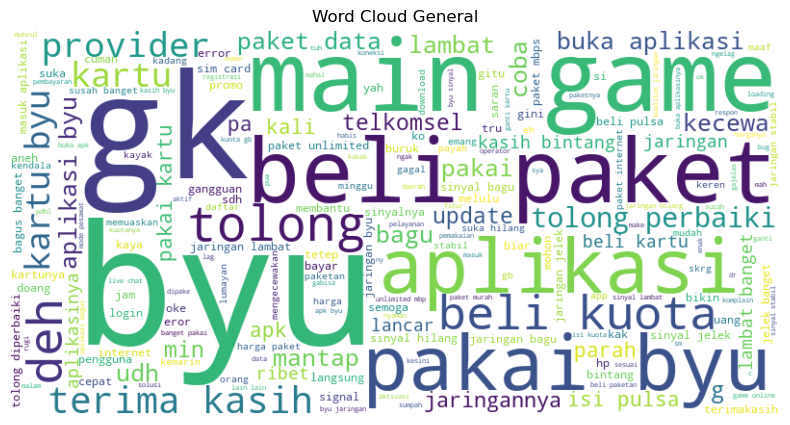

In [23]:
# Buat word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(clean_df['text_akhir'].str.cat(sep=' '))

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud General")
plt.show()

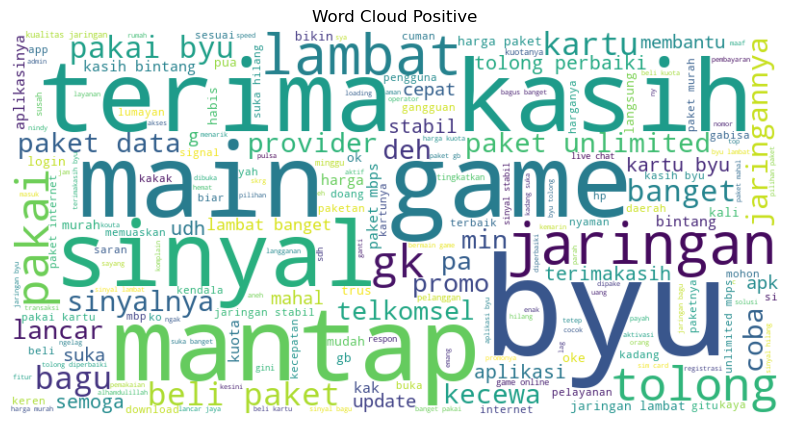

In [24]:
# Buat word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(clean_df[clean_df['polarity'] == 'positive']['text_akhir'].str.cat(sep=' '))

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Positive")
plt.show()

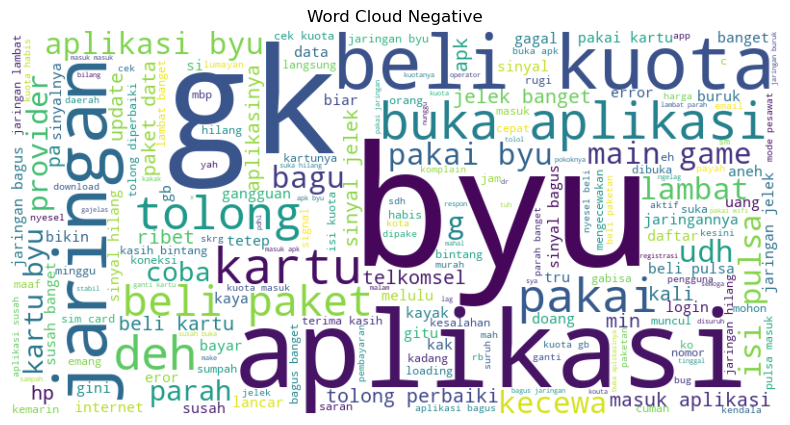

In [25]:
# Buat word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(clean_df[clean_df['polarity'] == 'negative']['text_akhir'].str.cat(sep=' '))

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Negative")
plt.show()

## Data Splitting dan Ekstraksi Fitur dengan TF-IDF

Nah, setelah berhasil menetapkan label untuk setiap entri dalam dataset, sekarang kita dapat melangkah ke tahap berikutnya, yaitu ekstraksi fitur dan pemisahan data. Apakah teman-teman masih ingat tentang ekstraksi fitur yang telah kita pelajari sebelumnya? Pada contoh kali ini, kita akan menggunakan metode ekstraksi fitur yang disebut TF-IDF.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
# Fit hanya pada training set
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test set pakai vocab & IDF dari training
X_test_tfidf = tfidf.transform(X_test)


In [34]:
features_train_df = pd.DataFrame(
    X_train_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

In [35]:
features_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

In [38]:
features_train_df.head()

,aja,aktif,aktivasi,akun,aman,aneh,apk,aplikasi,aplikasinya,app,...,turun,udah,udh,ulang,unlimited,update,via,wifi,yg,youtube
0,0.0,0.0,0.604114,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.435763,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

Setelah proses ekstraksi fitur dan pemisahan data, tahapan terakhir adalah melakukan pemodelan. Pada contoh ini, kita menggunakan empat algoritma yang berbeda: Naive Bayes (NB), Random Forest (RF), Logistic Regression (LR), dan Decision Tree (DT). 

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [41]:
from sklearn.naive_bayes import BernoulliNB
 
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()
 
# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(features_train_df.values, y_train_enc)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(features_train_df.values)
y_pred_test_nb = naive_bayes.predict(features_test_df.values)
 
# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train_enc)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test_enc)
 
# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.791988299341838
Naive Bayes - accuracy_test: 0.7952981961973891


## Deep Learning mode

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
# Encode label
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# Bagi data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)

In [30]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


In [31]:
# ============================
# 2. Tokenisasi & Padding
# ============================
max_words = 10000   # jumlah kata unik maksimum
max_len = 100       # panjang sequence maksimum

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [45]:
from tensorflow.keras.layers import LSTM
# ============================
# 3. Bangun Model GRU
# ============================
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),   # ⬅️ diganti LSTM
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # untuk binary classification
])

model.compile(
    loss='binary_crossentropy',   # ⬅️ lebih tepat untuk 2 kelas
    optimizer='adam',
    metrics=['accuracy']
)

model.build(input_shape=(None, max_len))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,745 (6.50 MB)

 Trainable params: 1,703,745 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.9772372356475477, 1: 1.0238484789661961}


In [47]:
# ============================
# 4. Training
# ============================
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=128,
    class_weight=class_weights_dict
)

Epoch 1/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5001 - loss: 0.6934 - val_accuracy: 0.5164 - val_loss: 0.6930
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.4975 - loss: 0.6933 - val_accuracy: 0.4836 - val_loss: 0.6932
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.4836 - val_loss: 0.6936
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5164 - val_loss: 0.6930
Epoch 5/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5164 - val_loss: 0.6929
Epoch 6/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.4836 - val_loss: 0.6933
Epoch 7/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.4978 - loss: 0.6932 - val_accuracy: 0.5164 - val_loss: 0.6930
Epoch 8/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.4957 - loss: 0.6932 - 